In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
#tried alternative dependency as below, but it didn't work
#from sqlalchemy.orm.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
 # Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date  = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_prior_to_most_recent_data_point = (dt.date(2017,8,23)) - dt.timedelta(days=365)
year_prior_to_most_recent_data_point

datetime.date(2016, 8, 23)

<Figure size 5000x800 with 0 Axes>

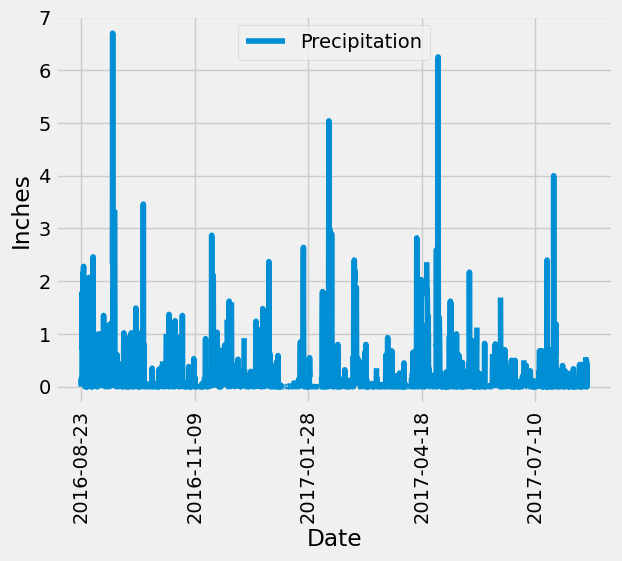

In [22]:
#first we need to order the date by each weather substation     
prcp_results = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= year_prior_to_most_recent_data_point).\
        order_by(measurement.date).all()


# Perform a query to retrieve the data and precipitation scores
#prcp_results to just check

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_results, columns = ['Date','Precipitation'])

# Sort the dataframe by date
prcp_df_sorted = prcp_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df_sorted.plot(x = 'Date', y= 'Precipitation')
plt.xticks(rotation=90)
plt.ylabel('Inches')

plt.show()



In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = prcp_df_sorted.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(func.count(station.station)).all()
number_stations[0][0]

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
#find the most rows in the measurement table, and the name of that substation


most_frequent_station = session.query(measurement.station, func.count(measurement.station)).\
        group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

# List the stations and their counts in descending order.
most_frequent_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_description = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
.filter(measurement.station =='USC00519281').all()

temp_description

[(54.0, 85.0, 71.66378066378067)]

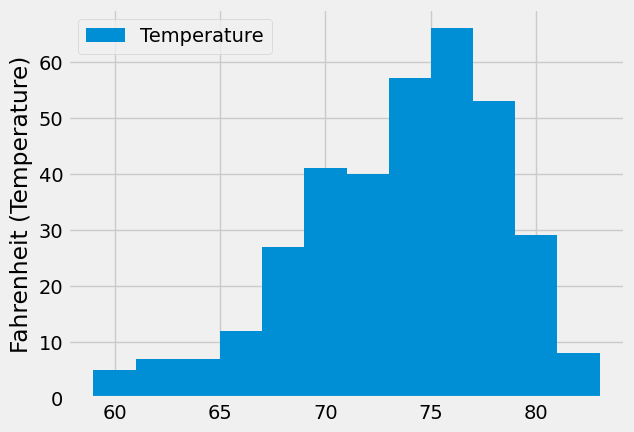

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_last_twelve_months  = session.query(measurement.tobs).filter(measurement.station =='USC00519281')\
                    .filter(measurement.date >= year_prior_to_most_recent_data_point).all()
tobs_last_twelve_months



tobs_df = pd.DataFrame(tobs_last_twelve_months, columns = ['Temperature'])

tobs_df.plot(kind = 'hist', bins=12)
#plt.xticks(rotation=90)
plt.ylabel('Fahrenheit (Temperature)')

plt.show()



# Close Session

In [ ]:
# Close Session
session.close()